# LETS GROW MORE - DATA SCIENCE INTERNSHIP

# TASK 3 MUSIC RECOMMENDATIONS

## AUTHOR - Amitabh Kumar Vishwakarma 

### IMPORTING LIBRARIES

In [1]:
# Load Python libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

### UPLOADING CSV FILES 

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [4]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [5]:
df = df.sample(frac=0.1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 4345439 to 7284238
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   msno                737742 non-null  object
 1   song_id             737742 non-null  object
 2   source_system_tab   735287 non-null  object
 3   source_screen_name  696203 non-null  object
 4   source_type         735629 non-null  object
 5   target              737742 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 39.4+ MB


In [7]:
songs = pd.read_csv('songs.csv')

In [8]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


### MERGING CSV FILES

In [9]:
df = pd.merge(df, songs, on='song_id', how='left')
del songs

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 0 to 737741
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   msno                737742 non-null  object 
 1   song_id             737742 non-null  object 
 2   source_system_tab   735287 non-null  object 
 3   source_screen_name  696203 non-null  object 
 4   source_type         735629 non-null  object 
 5   target              737742 non-null  int64  
 6   song_length         737735 non-null  float64
 7   genre_ids           725891 non-null  object 
 8   artist_name         737735 non-null  object 
 9   composer            571118 non-null  object 
 10  lyricist            420113 non-null  object 
 11  language            737730 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 73.2+ MB


In [11]:
members = pd.read_csv('members.csv')

In [12]:
df = pd.merge(df, members, on='msno', how='left')
del members

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 0 to 737741
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    737742 non-null  object 
 1   song_id                 737742 non-null  object 
 2   source_system_tab       735287 non-null  object 
 3   source_screen_name      696203 non-null  object 
 4   source_type             735629 non-null  object 
 5   target                  737742 non-null  int64  
 6   song_length             737735 non-null  float64
 7   genre_ids               725891 non-null  object 
 8   artist_name             737735 non-null  object 
 9   composer                571118 non-null  object 
 10  lyricist                420113 non-null  object 
 11  language                737730 non-null  float64
 12  city                    737742 non-null  int64  
 13  bd                      737742 non-null  int64  
 14  gender              

### USING PANDAS LIBRARY ON MERGED FILES

In [14]:
# Replace NA
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 0 to 737741
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    737742 non-null  object 
 1   song_id                 737742 non-null  object 
 2   source_system_tab       737742 non-null  object 
 3   source_screen_name      737742 non-null  object 
 4   source_type             737742 non-null  object 
 5   target                  737742 non-null  int64  
 6   song_length             737742 non-null  float64
 7   genre_ids               737742 non-null  object 
 8   artist_name             737742 non-null  object 
 9   composer                737742 non-null  object 
 10  lyricist                737742 non-null  object 
 11  language                737742 non-null  float64
 12  city                    737742 non-null  int64  
 13  bd                      737742 non-null  int64  
 14  gender              

### FINDING CORRELATION OF MERGED FILES

In [16]:
# Create Dates

# registration_init_time
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [17]:
#Dates to categoty
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [18]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [19]:
df.corr()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
msno,1.000000,0.001459,0.010586,-0.001957,-0.001662,0.001316,0.002499,0.001417,0.002859,0.002510,...,-0.007611,-0.001917,0.005382,0.009908,0.004501,0.010970,0.010789,0.001213,0.010409,0.000294
song_id,0.001459,1.000000,-0.002818,0.001304,0.004796,-0.003097,-0.010373,0.005702,-0.020866,-0.033714,...,0.002036,-0.002678,0.001310,-0.002080,0.001336,-0.000548,-0.001239,-0.001368,0.000160,-0.002181
source_system_tab,0.010586,-0.002818,1.000000,-0.030259,-0.077333,0.033896,0.024708,0.035960,0.035853,0.055265,...,-0.025143,0.033559,-0.042591,0.055614,-0.038571,-0.015444,0.005648,0.037851,0.012688,0.005261
source_screen_name,-0.001957,0.001304,-0.030259,1.000000,0.415003,-0.058512,0.024846,-0.016741,0.011812,0.020687,...,0.017695,-0.034251,0.039412,-0.034412,0.037864,0.005167,-0.001626,-0.025067,-0.005462,-0.000484
source_type,-0.001662,0.004796,-0.077333,0.415003,1.000000,-0.126935,0.015618,-0.050080,-0.019385,-0.002080,...,0.022497,-0.026767,0.034262,-0.044026,0.032436,0.005806,0.003165,-0.035863,0.000593,-0.005129
target,0.001316,-0.003097,0.033896,-0.058512,-0.126935,1.000000,-0.002842,0.018153,0.012742,-0.002842,...,-0.012274,0.010930,-0.004150,0.058416,-0.003216,-0.006047,0.000109,0.041007,0.012591,0.002497
song_length,0.002499,-0.010373,0.024708,0.024846,0.015618,-0.002842,1.000000,0.029959,0.114629,0.099061,...,0.001984,0.002512,-0.008580,0.007359,-0.008580,0.001332,-0.000093,0.005578,0.000803,0.000660
genre_ids,0.001417,0.005702,0.035960,-0.016741,-0.050080,0.018153,0.029959,1.000000,0.208104,0.156338,...,-0.004088,0.004803,-0.001730,0.005139,-0.002528,0.004584,0.001295,0.005565,-0.003883,0.001109
artist_name,0.002859,-0.020866,0.035853,0.011812,-0.019385,0.012742,0.114629,0.208104,1.000000,0.341277,...,-0.000970,0.001248,-0.007854,0.007570,-0.008316,0.005618,-0.000315,0.003693,0.003198,0.001654
composer,0.002510,-0.033714,0.055265,0.020687,-0.002080,-0.002842,0.099061,0.156338,0.341277,1.000000,...,-0.001089,0.000986,-0.005807,0.007315,-0.006479,0.006909,-0.001611,0.004729,0.001584,-0.000671


### PLOTTING CORRELATION OF MODEL

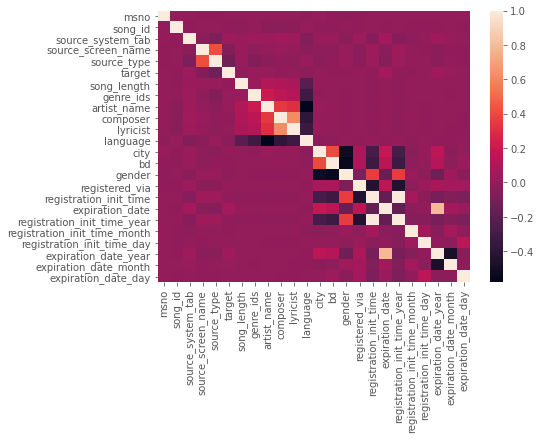

In [20]:
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

### RANDOM FOREST CLASSIFIER

In [22]:
# Model with the best estimator
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'target']], df.target)

RandomForestClassifier(max_depth=25, n_estimators=250)

In [23]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

### PLOTTING BARPLOT OF MODEL

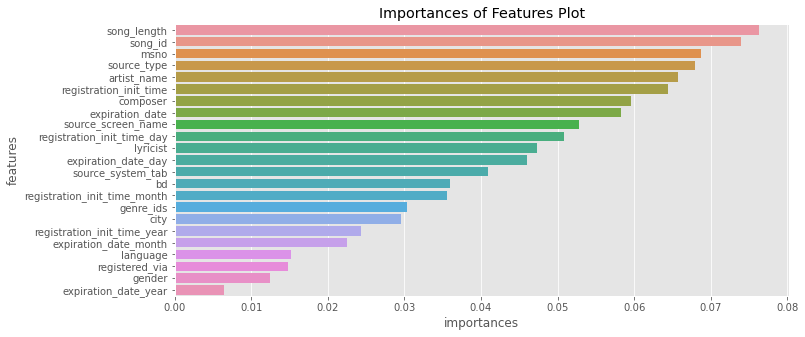

In [24]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

### IMPORTANT MODEL FEATURES

In [25]:
model.feature_importances_

array([0.06876942, 0.07393156, 0.04091675, 0.05278661, 0.06798518,
       0.07632823, 0.03030771, 0.065764  , 0.05952332, 0.04736171,
       0.01518405, 0.02950738, 0.03588952, 0.01248325, 0.01480933,
       0.06439395, 0.05833583, 0.0243814 , 0.03556155, 0.0508476 ,
       0.00638808, 0.02250557, 0.046038  ])

In [26]:
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [27]:
list(df.columns)

['msno',
 'song_id',
 'source_system_tab',
 'source_screen_name',
 'source_type',
 'target',
 'song_length',
 'artist_name',
 'composer',
 'lyricist',
 'registration_init_time',
 'expiration_date',
 'registration_init_time_day',
 'expiration_date_day']

In [28]:
target = df.pop('target')

### TRAINIG MODEL USING SKLEARN

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.3)
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model.fit(train_data, train_labels)

[15:17:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=15, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### CONCLUSION

In [31]:
predict_labels = model.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67    109867
           1       0.67      0.70      0.68    111456

    accuracy                           0.68    221323
   macro avg       0.68      0.68      0.68    221323
weighted avg       0.68      0.68      0.68    221323

